# 시계열 분석(Time series analysis)이란,
- 독립변수(Independent variable)를 이용하여 종속변수(Dependent variable)를 예측하는 일반적인 기계학습 방법론에 대하여 시간을 독립변수로 사용한다는 특징이 있다. 독립변수로 시간을 사용하는 특성때문에 분석에 있어서 일반적인 방법론들과는 다른 몇가지 고려가 필요하다.

-https://byeongkijeong.github.io/ARIMA-with-Python/

- ARIMA는 Autoregressive Integrated Moving Average의 약자로, Autoregressive는 자기회귀모형을 의미하고, Moving Average는 이동평균모형을 의미한다.

- 즉, ARIMA는 자기회귀와 이동평균을 둘 다 고려하는 모형인데, ARMA와 ARIMA의 차이점은 ARIMA의 경우 시계열의 비정상성(Non-stationary)을 설명하기 위해 관측치간의 차분(Diffrance)을 사용한다는 차이점이 있다.

- 현실에 존재하는 시계열자료는 불안정(Non-stationary)한 경우가 많다. 그런데 AR(p), MA(q) 모형이나, 이 둘을 합한 ARMA(p, q)모형으로는 이러한 불안정성을 설명할 수가 없다.
- 따라서 모형 그 자체에 이러한 비정상성을 제거하는 과정을 포함한것이 ARIMA모형이며 ARIMA(p, d, q)로 표현한다.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('axes',unicode_minus=False)

In [30]:
df = pd.read_csv('dataset/market-price',header=0,index_col=0,squeeze=True)

In [31]:
df

Timestamp
2020-09-21 00:00:00    10919.65
2020-09-22 00:00:00    10430.46
2020-09-23 00:00:00    10532.22
2020-09-24 00:00:00    10234.48
2020-09-25 00:00:00    10732.43
                         ...   
2020-11-16 00:00:00    15968.16
2020-11-17 00:00:00    16725.15
2020-11-18 00:00:00    17679.72
2020-11-19 00:00:00    17798.45
2020-11-20 00:00:00    17820.57
Name: market-price, Length: 61, dtype: float64

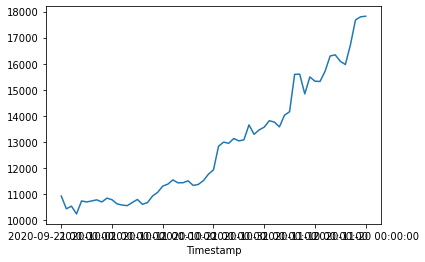

In [32]:
df.plot()

ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d 가 그것이다. 보통은 p, d, q의 순서로 쓴다.
통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.

여기서 p * q = 0 이라 하면, 두 값중 하나는 0이라는 이야기이다. ARIMA는 AR모형과 MA모형을 하나로 합쳤다면서 둘 중 하나의 모수가 0인건 또 무슨소리? 라고 할지 모르겠지만, 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 이렇게 사용하는것이 더 잘 맞는다고 한다.

그렇다면, p와 d, q는 어떻게 정해야 할까? Rules of thumb이긴 하지만 ACF plot와 PACF plot을 통해 AR 및 MA의 모수를 추정할 수 있다.

시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
반대로, MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다.
급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용할 수 있다. 또한 데이터를 차분하여 ACF 및 PACF 계산함으로써 적절한 차분횟수까지 구할 수 있다 

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

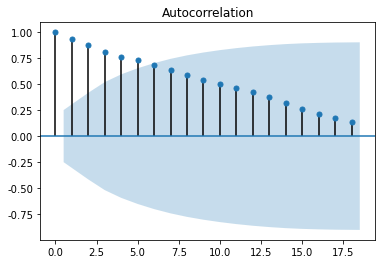

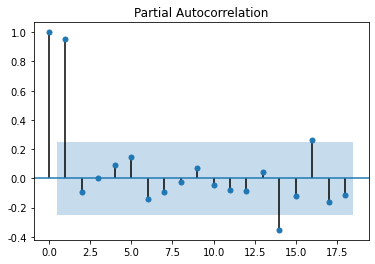

In [36]:
plot_acf(df)
plot_pacf(df)
plt.show()

acf는 천천히 감소하고 pacf는 급격히 감소하는걸로 봐서 ma특성 p=0,q=1

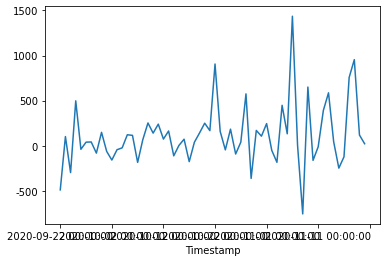

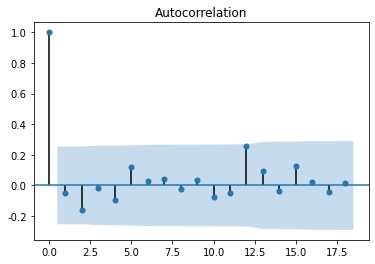

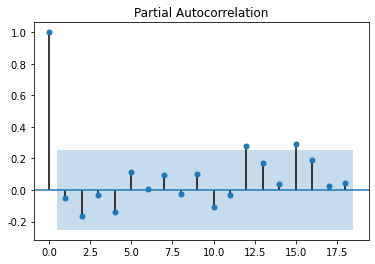

In [40]:
diff_1 = df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model = ARIMA(df,order=(0,1,1))

C:\Users\BIT-R45\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\BIT-R45\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [53]:
model_fit =model.fit(trend='nc',full_output=True, disp=1)

RuntimeError: 
Model has been fit using trend=nc and method=css-mle. These cannot be changed
in subsequent calls to `fit`. Instead, use a new instance of ARMA.


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market-price   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -435.579
Method:                       css-mle   S.D. of innovations            344.011
Date:                Fri, 20 Nov 2020   AIC                            877.159
Time:                        16:36:36   BIC                            883.442
Sample:                    09-22-2020   HQIC                           879.616
                         - 11-20-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  115.8673     41.247      2.809      0.005      35.026     196.709
ma.L1.D.market-price    -0.0734      0.162     -0.454      0.650      -0.391       0.244
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           13.6148           +0.0000j           13.6148            0.0000
-----------------------------------------------------------------------------
"""

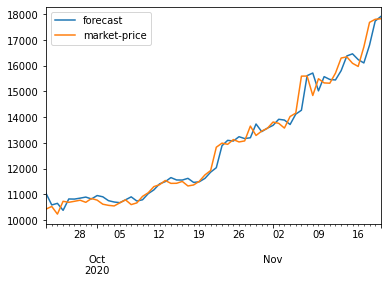

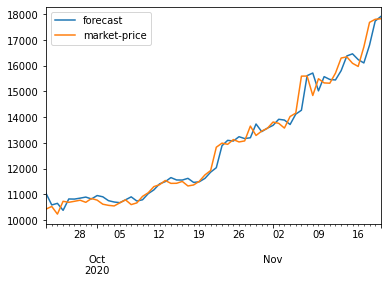

In [52]:
model_fit.plot_predict()